# Apply linear Regression with Python Scikit-Learning

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [17]:
df = pd.read_csv("laptop_data.csv")


In [18]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11175.754549,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10776.777318,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10329.931067,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11814.475945,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11473.100973,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [19]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10555.256584,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10433.899310,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11288.114524,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9409.283030,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10614.128815,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [20]:
df.shape

(1273, 13)

In [21]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [22]:
df.duplicated().sum()

1

In [23]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


# Setting Dependent and Independent Variable

In [25]:
x = df['Weight']
y = df['Price']
x = x.values.reshape(len(x),1)
y = y.values.reshape(len(y),1)


# Building The Model

In [26]:
# splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#making instances
lr = LinearRegression()
# fitting model
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
# evaluating mean squared error
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error = ", mse)

Mean Square Error =  370772.6563950971


# Plot Best fit Line

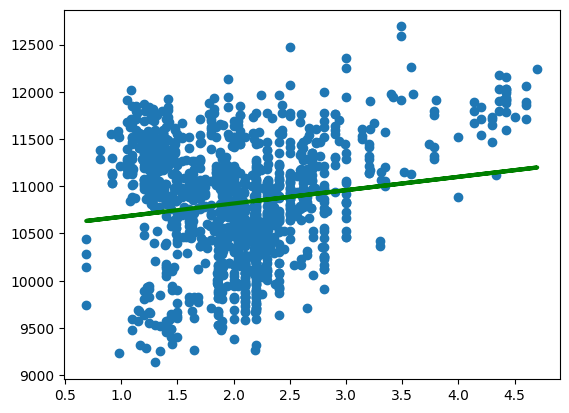

In [28]:
line = lr.intercept_ + lr.coef_ * x
plt.scatter(x,y)
plt.plot(x, line, color='green', linewidth=3);
plt.show()


# Last step to make Prediction


In [29]:
# prediction for weight 3.9kg weight of the laptop
Y = lr.intercept_ + lr.coef_ * 3.9
print("Predicted price of the laptop acc to weight =  ", Y)

Predicted price of the laptop acc to weight =   [[11085.75858074]]
